In [97]:
#Include this line to make plots interactive
%matplotlib notebook

#Dependencies and Set up 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Study data files
Vaccine_2021_data = "Vaccine_2021.csv"
Vaccine_2022_data = "Vaccine_2022.csv"
Vaccine_2023_data = "Vaccine_2023.csv"


# Read the 2021 data 
Vaccine_2021_data = pd.read_csv(Vaccine_2021_data, low_memory=False)
Vaccine_2021_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,...,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct,0,0.1,0.2
0,9/17/2021,97.9,5379,37.8,0,0.0,5379,44.5,5187,47.6,...,70.6,14230,0,12099,10908,0,46.7,0,0,0
1,9/17/2021,96.3,17198,38.4,0,0.0,17192,45.2,16542,47.9,...,74.9,44829,0,38043,34516,0,46.1,0,0,0
2,9/17/2021,89.4,3996,45.2,0,0.0,3996,53.5,3754,56.1,...,65.0,8846,0,7465,6696,0,0.0,0,0,0
3,9/17/2021,92.4,6356,28.4,0,0.0,6356,32.6,6092,34.2,...,56.2,22394,0,19480,17837,0,36.6,0,0,0
4,9/17/2021,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0.0,54406,0,46621,42382,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345938,12/31/2021,94.6,383231,73.0,383222,77.2,369096,82.0,339081,83.3,...,95.0,524989,496254,450231,407024,88351,93.2,0,0,0
345939,12/31/2021,98.0,33256,50.8,33255,54.2,32878,59.1,31489,62.1,...,83.0,65435,61336,55643,50674,13513,55.3,0,0,0
345940,12/31/2021,99.1,34194,45.0,34193,48.3,33905,53.1,31905,54.3,...,95.0,75951,70826,63829,58799,8040,52.1,0,0,0
345941,12/31/2021,98.6,88307,55.8,88304,59.5,86501,65.1,80833,67.7,...,91.8,158167,148304,132804,119315,23480,63.3,0,0,0


In [98]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2021_df = Vaccine_2021_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2021_df

,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,9/17/2021,5379,0,5379,5187,1929
1,9/17/2021,17198,0,17192,16542,6127
2,9/17/2021,3996,0,3996,3754,1285
3,9/17/2021,6356,0,6356,6092,2097
4,9/17/2021,0,0,0,0,0
...,...,...,...,...,...,...
345938,12/31/2021,383231,383222,369096,339081,85722
345939,12/31/2021,33256,33255,32878,31489,11218
345940,12/31/2021,34194,34193,33905,31905,8106
345941,12/31/2021,88307,88304,86501,80833,21546


In [99]:
Vaccine_2021_df["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]


C:\Users\afoy0\AppData\Local\Temp\ipykernel_14496\1898863748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2021_df["Ages 5 to 17"]=Vaccine_2021_data["Series_Complete_5Plus"]+Vaccine_2021_data["Series_Complete_12Plus"]


In [100]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2021_df =Vaccine_2021_df.reindex(columns=columns)
Vaccine_2021_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,9/17/2021,5379,5379,5187,1929
1,9/17/2021,17198,17192,16542,6127
2,9/17/2021,3996,3996,3754,1285
3,9/17/2021,6356,6356,6092,2097
4,9/17/2021,0,0,0,0


In [101]:
#Rename Columns
Vaccine_2021_df = Vaccine_2021_df.rename(columns={"Series_Complete_Yes":"Series Complete 2021",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17 2021",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+ 2021",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+ 2021",
                                                       })
Vaccine_2021_df

,Date,Series Complete 2021,Series Complete Ages 5 to 17 2021,Series Complete Ages 18+ 2021,Series Complete Ages 65+ 2021
0,9/17/2021,5379,5379,5187,1929
1,9/17/2021,17198,17192,16542,6127
2,9/17/2021,3996,3996,3754,1285
3,9/17/2021,6356,6356,6092,2097
4,9/17/2021,0,0,0,0
...,...,...,...,...,...
345938,12/31/2021,383231,752318,339081,85722
345939,12/31/2021,33256,66133,31489,11218
345940,12/31/2021,34194,68098,31905,8106
345941,12/31/2021,88307,174805,80833,21546


In [102]:
print(Vaccine_2021_df[['Series Complete 2021','Series Complete Ages 5 to 17 2021','Series Complete Ages 18+ 2021','Series Complete Ages 65+ 2021']].mean())

Series Complete 2021                 56961.505919
Series Complete Ages 5 to 17 2021    70343.528203
Series Complete Ages 18+ 2021        52995.782311
Series Complete Ages 65+ 2021        13843.350488
dtype: float64


<IPython.core.display.Javascript object>


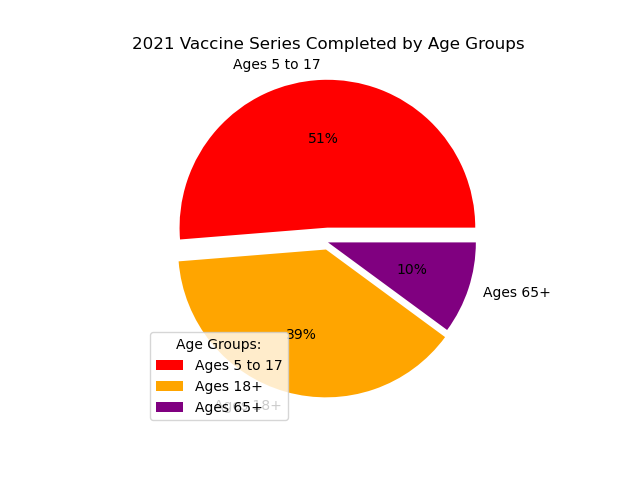

In [111]:
x = [70343.528203, 52995.782311, 13843.350488]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)

ax.set_title('2021 Vaccine Series Completed by Age Groups')
plt.legend(title = "Age Groups:")
#Save and display the chart
plt.savefig("Images/2021 Completed chart.png")
plt.show()


In [112]:
# Read the 2022 data 
Vaccine_2022_data = pd.read_csv(Vaccine_2022_data, low_memory=False)
Vaccine_2022_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct,0
0,1/1/2022,73.7,5602,77.4,5602,81.2,0,0.0,5411,84.8,...,1719,95.0,7235,6900,0,6384,5933,1557,87.9,0
1,1/1/2022,96.2,24798,51.7,24797,54.2,0,0.0,24377,57.3,...,6830,85.1,47935,45743,0,42545,39869,8030,58.0,0
2,1/1/2022,90.3,4061,40.3,4061,43.3,0,0.0,4016,48.1,...,1467,66.3,10067,9382,0,8357,7520,2214,0.0,0
3,1/1/2022,94.9,11549,46.4,11549,49.7,0,0.0,11442,54.5,...,3677,77.3,24909,23259,0,21003,19211,4759,54.1,0
4,1/1/2022,94.1,16051,43.1,16051,46.2,0,0.0,15956,51.1,...,5387,76.7,37266,34724,0,31218,28286,7024,48.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640250,12/28/2022,98.6,42160,45.8,42106,48.8,2708,17.8,41335,52.9,...,14585,79.4,91987,86197,15201,78171,70996,18364,48.6,0
640251,12/28/2022,98.0,17799,46.3,17789,49.1,1009,16.3,17514,53.2,...,6253,77.9,38469,36194,6201,32945,29993,8024,50.7,0
640252,12/28/2022,98.0,30050,59.3,29999,62.6,2969,34.7,29054,66.8,...,8420,86.7,50643,47904,8546,43496,39358,9711,63.8,0
640253,12/28/2022,98.2,5046,56.1,5041,59.7,664,49.6,4810,62.2,...,1253,83.6,8988,8444,1338,7731,7106,1499,64.6,0


In [114]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2022_df = Vaccine_2022_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2022_df

,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,1/1/2022,5602,5602,5411,5103,1719
1,1/1/2022,24798,24797,24377,23226,6830
2,1/1/2022,4061,4061,4016,3811,1467
3,1/1/2022,11549,11549,11442,10831,3677
4,1/1/2022,16051,16051,15956,15300,5387
...,...,...,...,...,...,...
640250,12/28/2022,42160,42106,41335,39398,14585
640251,12/28/2022,17799,17789,17514,16780,6253
640252,12/28/2022,30050,29999,29054,27030,8420
640253,12/28/2022,5046,5041,4810,4377,1253


In [115]:
Vaccine_2022_df["Ages 5 to 17"]=Vaccine_2022_data["Series_Complete_5Plus"]+Vaccine_2022_data["Series_Complete_12Plus"]


C:\Users\afoy0\AppData\Local\Temp\ipykernel_14496\2522279734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2022_df["Ages 5 to 17"]=Vaccine_2022_data["Series_Complete_5Plus"]+Vaccine_2022_data["Series_Complete_12Plus"]


In [116]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2022_df =Vaccine_2022_df.reindex(columns=columns)
Vaccine_2022_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,1/1/2022,5602,11013,5103,1719
1,1/1/2022,24798,49174,23226,6830
2,1/1/2022,4061,8077,3811,1467
3,1/1/2022,11549,22991,10831,3677
4,1/1/2022,16051,32007,15300,5387


In [117]:
#Rename Columns
Vaccine_2022_df = Vaccine_2022_df.rename(columns={"Series_Complete_Yes":"Series Complete",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+",
                                                        })
Vaccine_2022_df

,Date,Series Complete,Series Complete Ages 5 to 17,Series Complete Ages 18+,Series Complete Ages 65+
0,1/1/2022,5602,11013,5103,1719
1,1/1/2022,24798,49174,23226,6830
2,1/1/2022,4061,8077,3811,1467
3,1/1/2022,11549,22991,10831,3677
4,1/1/2022,16051,32007,15300,5387
...,...,...,...,...,...
640250,12/28/2022,42160,83441,39398,14585
640251,12/28/2022,17799,35303,16780,6253
640252,12/28/2022,30050,59053,27030,8420
640253,12/28/2022,5046,9851,4377,1253


In [118]:
print(Vaccine_2022_df[['Series Complete','Series Complete Ages 5 to 17','Series Complete Ages 18+','Series Complete Ages 65+']].mean())

Series Complete                  65757.643426
Series Complete Ages 5 to 17    129098.243847
Series Complete Ages 18+         58990.976851
Series Complete Ages 65+         14895.264637
dtype: float64


<IPython.core.display.Javascript object>


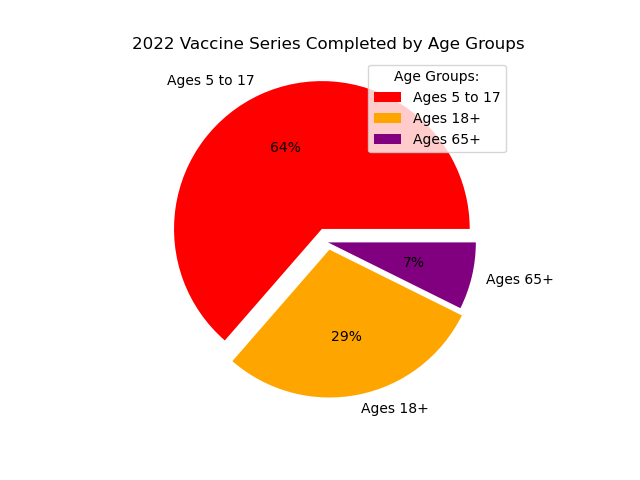

In [120]:
x2 = [129098.243847, 58990.976851, 14895.264637]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x2,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)
plt.legend(title = "Age Groups:")
ax.set_title('2022 Vaccine Series Completed by Age Groups')
#Save and display the chart
plt.savefig("Images/2022 Completed chart.png")
plt.show()

In [121]:
# Read the 2023 data 
Vaccine_2023_data = pd.read_csv(Vaccine_2023_data, low_memory=False)
Vaccine_2023_data

,Date,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Administered_Dose1_Pop_Pct
0,1/4/2023,93.9,3580,58.7,3575,61.3,259,30.7,3482,64.7,...,66.5,1051,80.9,6102,5830,845,5379,4985,1299,60.3
1,1/4/2023,97.0,20253,75.9,20165,80.4,2797,60.9,18976,84.4,...,84.8,4568,95.0,26675,25069,4595,22494,20474,4469,95.0
2,1/4/2023,91.3,1771,28.2,1771,29.7,68,7.2,1764,32.1,...,34.0,637,42.9,6270,5961,949,5499,5012,1484,32.7
3,1/4/2023,97.3,24904,81.6,24890,84.6,3311,78.8,23473,86.3,...,85.6,5554,87.5,30504,29420,4203,27205,25217,6351,90.5
4,1/4/2023,88.9,3278,48.4,3275,51.1,264,26.1,3186,54.5,...,55.7,1054,62.9,6778,6412,1011,5850,5401,1677,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62372,5/10/2023,91.3,3057,33.3,3055,34.9,85,6.3,3033,37.5,...,40.0,1402,52.2,9174,8756,1340,8086,7416,2684,41.0
62373,5/10/2023,96.7,13461,76.8,13436,82.2,1319,43.0,12911,88.4,...,91.2,3593,95.0,17526,16351,3066,14600,13285,3158,93.4
62374,5/10/2023,94.0,23657,45.7,23634,48.0,1529,18.9,23260,51.6,...,53.8,8384,75.2,51787,49229,8105,45057,41124,11149,51.8
62375,5/10/2023,95.1,14030,56.3,13979,60.1,1005,24.8,13710,65.3,...,67.5,3909,82.1,24909,23259,4048,21003,19211,4759,65.2


In [122]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
Vaccine_2023_df = Vaccine_2023_data[["Date", "Series_Complete_Yes", "Series_Complete_5Plus", "Series_Complete_12Plus","Series_Complete_18Plus", "Series_Complete_65Plus"]]
Vaccine_2023_df

,Date,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_12Plus,Series_Complete_18Plus,Series_Complete_65Plus
0,1/4/2023,3580,3575,3482,3316,1051
1,1/4/2023,20253,20165,18976,17368,4568
2,1/4/2023,1771,1771,1764,1703,637
3,1/4/2023,24904,24890,23473,21579,5554
4,1/4/2023,3278,3275,3186,3011,1054
...,...,...,...,...,...,...
62372,5/10/2023,3057,3055,3033,2970,1402
62373,5/10/2023,13461,13436,12911,12117,3593
62374,5/10/2023,23657,23634,23260,22105,8384
62375,5/10/2023,14030,13979,13710,12974,3909


In [123]:
Vaccine_2023_df["Ages 5 to 17"]=Vaccine_2023_data["Series_Complete_5Plus"]+Vaccine_2023_data["Series_Complete_12Plus"]

C:\Users\afoy0\AppData\Local\Temp\ipykernel_14496\3841423440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccine_2023_df["Ages 5 to 17"]=Vaccine_2023_data["Series_Complete_5Plus"]+Vaccine_2023_data["Series_Complete_12Plus"]


In [124]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
columns =["Date","Series_Complete_Yes", "Ages 5 to 17","Series_Complete_18Plus", "Series_Complete_65Plus"]
Vaccine_2023_df =Vaccine_2023_df.reindex(columns=columns)
Vaccine_2023_df.head()

,Date,Series_Complete_Yes,Ages 5 to 17,Series_Complete_18Plus,Series_Complete_65Plus
0,1/4/2023,3580,7057,3316,1051
1,1/4/2023,20253,39141,17368,4568
2,1/4/2023,1771,3535,1703,637
3,1/4/2023,24904,48363,21579,5554
4,1/4/2023,3278,6461,3011,1054


In [125]:
#Rename Columns
Vaccine_2023_df = Vaccine_2023_df.rename(columns={"Series_Complete_Yes":"Series Complete",
                                                        "Ages 5 to 17":"Series Complete Ages 5 to 17",
                                                        "Series_Complete_18Plus":"Series Complete Ages 18+",
                                                        "Series_Complete_65Plus":"Series Complete Ages 65+",
                                                        })
Vaccine_2023_df

,Date,Series Complete,Series Complete Ages 5 to 17,Series Complete Ages 18+,Series Complete Ages 65+
0,1/4/2023,3580,7057,3316,1051
1,1/4/2023,20253,39141,17368,4568
2,1/4/2023,1771,3535,1703,637
3,1/4/2023,24904,48363,21579,5554
4,1/4/2023,3278,6461,3011,1054
...,...,...,...,...,...
62372,5/10/2023,3057,6088,2970,1402
62373,5/10/2023,13461,26347,12117,3593
62374,5/10/2023,23657,46894,22105,8384
62375,5/10/2023,14030,27689,12974,3909


In [126]:
print(Vaccine_2023_df[['Series Complete','Series Complete Ages 5 to 17','Series Complete Ages 18+','Series Complete Ages 65+']].mean())

Series Complete                  69418.251311
Series Complete Ages 5 to 17    135340.225804
Series Complete Ages 18+         61548.775719
Series Complete Ages 65+         15619.087677
dtype: float64


<IPython.core.display.Javascript object>


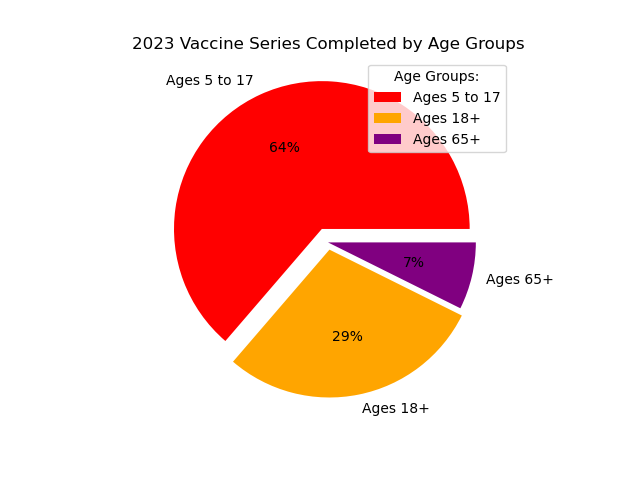

In [127]:
x3 = [135340.225804, 61548.775719, 15619.087677]
# Labels for the sections of our pie chart
labels = ["Ages 5 to 17", "Ages 18+","Ages 65+"]

# The values of each section of the pie chart
sizes = [5, 6, 7]

# The colors of each section of the pie chart
colors = ["red", "orange", "purple"]

# Tells matplotlib to separate the "Largest Dataset" section from the others
explode = (0.1, 0.05, 0)

fig, ax=plt.subplots()
ax.pie(x3,labels=labels,colors=colors,autopct='%.0f%%',explode=explode)
plt.legend(title = "Age Groups:")
ax.set_title('2023 Vaccine Series Completed by Age Groups')
#Save and display the chart
plt.savefig("Images/2023 Completed chart.png")
plt.show()

In [162]:
Vaccine_Data = pd.DataFrame({
    'Ages 5 to 17':[0,0,0,70344,129098,135340],
    'Ages 18+':[0,0,0,52996,58991,61549],
    'Ages 65+':[0,0,0,13843,14895,15619]
    }, index=[2018,2019,2020,2021, 2022, 2023])
lines = Vaccine_Data.plot.line()
